In [16]:
from PIL import Image
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2

In [26]:
def cut_img(image_arr, cutsize):
    # 从四边剪短cutsize大小
    return pic[cutsize-1:-cutsize,cutsize-1:-cutsize,:]

def add_img_color(image_arr):
    new_aari_array = np.full(shape=(image_arr.shape[:2]),fill_value=0)
    for i in range(3):
        new_aari_array += image_arr[:,:,i]
    return new_aari_array

# def conver_img(image_arr):
def recode_aari_mask(pic):
    pic[pic < 6] = 0
    pic[pic == 765] = 1 
    pic[pic == 128] = 2 
    pic[pic == 510] = 3 
    pic[pic == 249] = 4 
    pic[pic == 382] = 5
    pic[pic == 407] = 6
    pic[pic>6] = 0
    return pic

def recode_osisaf_mask(pic):
    pic[pic < 4] = 0
    pic[pic == 128] = 1
    pic[pic == 502] = 2
    pic[pic == 384] = 3
    pic[pic == 764] = 4
    pic[pic > 4] = 0
    return pic

In [20]:
pic_dir = r'E:\\python_workfile\\sea_ice_classification\\training2\\mask\\osisaf\\'
pic_path = glob.glob(pic_dir + r'*.png')


In [22]:
file = pic_path[0]
pic=cv2.imread(file)
pic = cut_img(pic, 15)
pic = add_img_color(pic)

KeyboardInterrupt: 

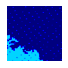

In [30]:
## 切分并重新编码aari
for file in pic_path:
    img_save_path = pic_dir + r'jet_small_size\\'
    npy_save_path = r'E:\\python_workfile\\sea_ice_classification\\training2\\mask\\osisaf\\npy\\'
    name = file.split('\\')[-1].split('.')[0]
    
    pic=cv2.imread(file)
    pic = cut_img(pic, 15)
    pic = add_img_color(pic)
    pic = recode_aari_mask(pic)
    size = 128
    for i in range(int(pic.shape[0]/size)):
        for j in range(int(pic.shape[1]/size)):
            fig = plt.figure(figsize = (1,1))
            plt.imshow(pic[i*size:(i+1) * size, j*size :(j+1) * size],vmax = 4,vmin = 0,cmap = plt.cm.jet)
            plt.axis('off')

            plt.margins(0,0)
            if i*12+j+1 < 10:
                day = '00' + str(i*12+j+1)
            elif 10<= i*12+j+1 < 100:
                day = '0' + str(i*12+j+1)
            else:
                day = str(i*12+j+1)
            np.save(npy_save_path + name + day, pic[i*size:(i+1) * size, j*size :(j+1) * size])
            plt.savefig(img_save_path + name + day,dpi = 170, bbox_inches='tight',pad_inches = 0)
            plt.close()

In [14]:
sig_pic_dir = r'E:\python_workfile\sea_ice_classification\training1\sigmod0'
sig_pic_files = glob.glob(sig_pic_dir + '\\*.png')

In [15]:
# 切分HY2B 后向散射系数
for file in sig_pic_files:
    
    img_save_path = r'E:\\python_workfile\\sea_ice_classification\\training1\\sigmod0\\small_size\\'
    name = file.split('\\')[-1].split('.')[0]
    
    pic=cv2.imread(file)
    pic = cut_img(pic, 15)
#     pic = add_img_color(pic)
#     pic = recode_aari_mask(pic)
    size = 128
    for i in range(int(pic.shape[0]/size)):
        for j in range(int(pic.shape[1]/size)):
            fig = plt.figure(figsize = (1,1))
            plt.imshow(pic[i*size:(i+1) * size, j*size :(j+1) * size],vmax = 6,vmin = 0,cmap = plt.cm.Pastel1)
            plt.axis('off')

            plt.margins(0,0)
            if i*12+j+1 < 10:
                day = '00' + str(i*12+j+1)
            elif 10<= i*12+j+1 < 100:
                day = '0' + str(i*12+j+1)
            else:
                day = str(i*12+j+1)
            plt.savefig(img_save_path + name + day,dpi = 170, bbox_inches='tight',pad_inches = 0)
            plt.close()